<a href="https://colab.research.google.com/github/lauraosede/CE888/blob/main/Lab_6/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from sklearn import metrics
from sklearn.decomposition import PCA 
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

## Lab 6: Exercise to be completed

### Task 7: To complete this task, please create a new notebook in Google Colab. 

Note: Please create a new notebook for this task.

Your data is stored in Lab_6/Data folder. There are two .csv files: 1) Country-data.csv and 2) data-dictionary.csv. Please explore the data and use any clustering method to find the list of countries, which can categorised as follows:

| S.No      | Categories |
| ----------- | ----------- |
| 1   | under-developing country |
| 2   | developing country       |
| 3   | developed country        |


Note: please justify your reason, why and how you have concluded your answer. 

# 1) Load dataset

In [63]:
data = pd.read_csv("/content/drive/MyDrive/data science /Data science and decision making/Country-data.csv")

In [64]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# 2) Exploratory Data Analysis

In [65]:
data.shape

(167, 10)

In [66]:
data.columns.values 

array(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'], dtype=object)



*   Label of each column


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [68]:
data.nunique(axis=0) #returns the number of unique values for each variable

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [81]:
data_drop = data.drop(['country'], axis=1)

In [82]:
data_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200




*   Our dataset has 167 observations and 10 characteristics. We can also see that 
*   Out of which one is dependent variable and rest 11 are independent variables — physico-chemical characteristics.

*   No variable column has null/missing values
*   Data has float, object and integer values


**Summary Statistics**

In [83]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**Check Outliers**

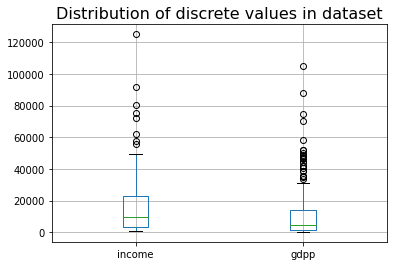

In [84]:
#boxplot for discrete values
boxplot = data.boxplot(column=['income', 'gdpp'], grid=True)
boxplot.axes.set_title("Distribution of discrete values in dataset", fontsize=16)
boxplot.plot()
plt.show()

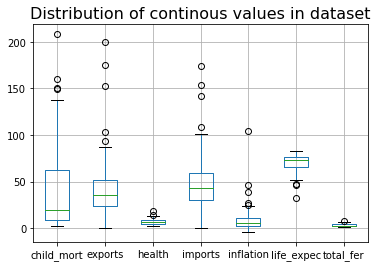

In [85]:
#boxplot for continous values
boxplot = data.boxplot(column=['child_mort', 'exports', 'health', 'imports', 
       'inflation', 'life_expec', 'total_fer'], grid=True)
boxplot.axes.set_title("Distribution of continous values in dataset", fontsize=16)
boxplot.plot()
plt.show()

From this boxplot, it is obvious that there are a lot of outliers in all the numeric columns in our dataset

**Dealing with outliers**

In [86]:
for col in data_drop.columns:
    percentiles = data_drop[col].quantile([0.05,0.95]).values
    data_drop[col] = np.clip(data_drop[col], percentiles[0], percentiles[1])

In [87]:
data_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,12.12,7.58,44.9,1610,9.44,56.2,5.820,553.0
1,16.6,28.00,6.55,48.6,9930,4.49,76.3,1.650,4090.0
2,27.3,38.40,4.17,31.4,12900,16.10,76.5,2.890,4460.0
3,116.0,62.30,2.85,42.9,5900,20.87,60.1,5.861,3530.0
4,10.3,45.50,6.03,58.9,19100,1.44,76.8,2.130,12200.0


**Lets see the box plot after outlier removal**

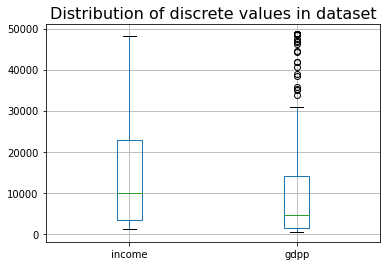

In [88]:
#boxplot for discrete values
boxplot = data_drop.boxplot(column=['income', 'gdpp'], grid=True)
boxplot.axes.set_title("Distribution of discrete values in dataset", fontsize=16)
boxplot.plot()
plt.show()

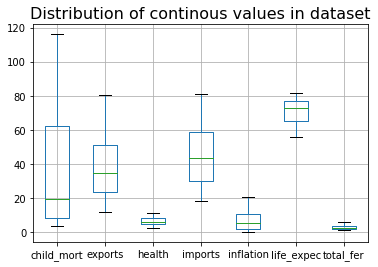

In [89]:
#boxplot for continous values
boxplot = data_drop.boxplot(column=['child_mort', 'exports', 'health', 'imports', 
       'inflation', 'life_expec', 'total_fer'], grid=True)
boxplot.axes.set_title("Distribution of continous values in dataset", fontsize=16)
boxplot.plot()
plt.show()

**From our box plot after outliers are capped and floored, it is obvious that gdpp still has some outliers. We used the 5th and 95th percentile because when we tried the 1st and 99th percentile, there were still a lot of outliers.**

**Check correlation**

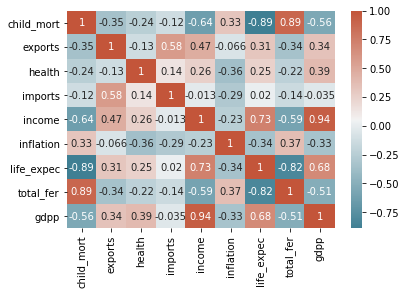

In [90]:
# calculate correlation matrix
corr = data_drop.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))



*   Here we can infer that "density" has strong positive correlation with "residual sugar" whereas it has strong negative correlation with "alcohol".
"free sulphur dioxide" and "citric acid" has almost no correlation with "quality"
Since correlation is zero we can infer there is no linear relationship between these two predictors.However it is safe to drop these features in case you're applying Linear Regression model to the dataset.
*   List item



**Key Observations**

# 3) Clustering

Clustering using K-means clustering

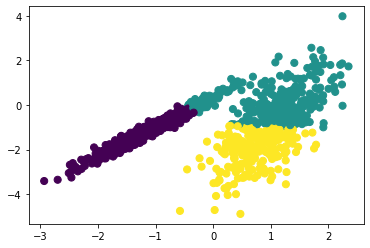

In [45]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(data_drop, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(data_drop.shape[0])[:n_clusters]
    centers = data_drop[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(data_drop, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([data_drop[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(data_drop, 3)
plt.scatter(data_drop[:, 0], data_drop[:, 1], c=labels,
            s=50, cmap='viridis');

## Alternate method for K-means clustering

In [100]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [104]:
#because kmean works with only numeric data, we remove the col of obj type
sel_col = ['country']
cluster_data = data.loc[:,sel_col]

In [105]:
cluster_data 

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
...,...
162,Vanuatu
163,Venezuela
164,Vietnam
165,Yemen


In [106]:
data_drop = data.drop(['country'], axis=1)

### Dimensionality Reduction and Clustering

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ('dim_reduction', PCA(n_components=2, random_state=0))
])

In [108]:
pc = pipeline.fit_transform(data_drop )

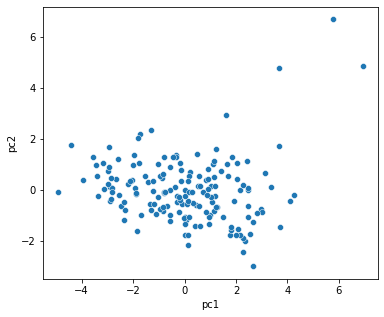

In [109]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pc[:,0], y=pc[:,1])
plt.xlabel("pc1")
plt.ylabel("pc2");

In [111]:
def kmeans_elbow_viz(data):
    sum_of_squared_distance = []
    n_cluster = range(1, 11)
    
    for k in n_cluster:
        kmean_model = KMeans(n_clusters=k)
        kmean_model.fit(data)
        sum_of_squared_distance.append(kmean_model.inertia_)
    
    plt.plot(n_cluster, sum_of_squared_distance, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow method for optimal K')
    plt.show();

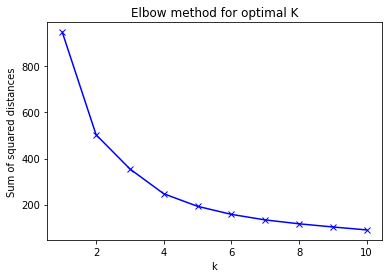

In [112]:
kmeans_elbow_viz(pc)

The elbow curves at 4, so we will start with 4 clusters

In [113]:
kmeans_model = KMeans(n_clusters=4)
y_cluster = kmeans_model.fit_predict(pc)

In [117]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pc)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

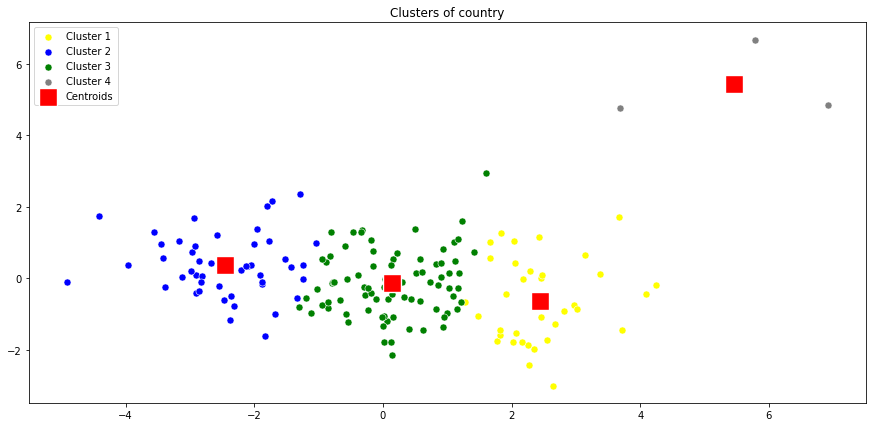

In [118]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(pc[y_kmeans == 0, 0], pc[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(pc[y_kmeans == 1, 0], pc[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(pc[y_kmeans == 2, 0], pc[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(pc[y_kmeans == 3, 0], pc[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of country')
plt.legend()
plt.show()

The question is to cluster countries into underdeveloped, developing and developed, so we are going to create 3 clusters 

In [155]:
kmeans_model = KMeans(n_clusters=3)
y_cluster = kmeans_model.fit_predict(pc)

In [156]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pc)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

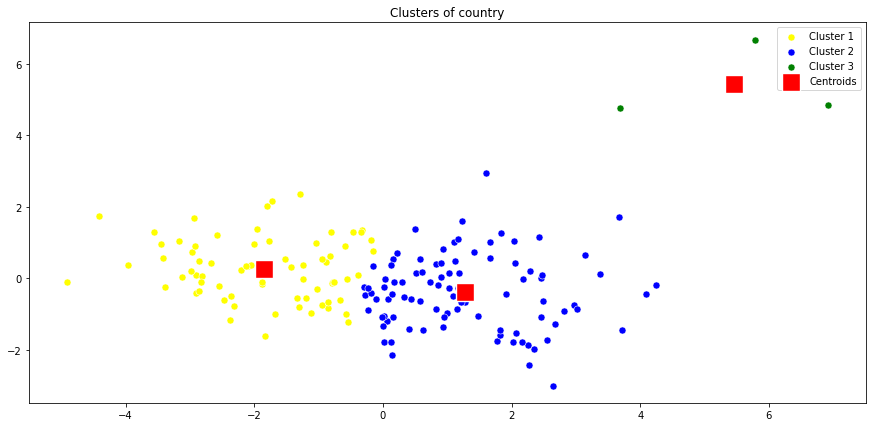

In [157]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(pc[y_kmeans == 0, 0], pc[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(pc[y_kmeans == 1, 0], pc[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(pc[y_kmeans == 2, 0], pc[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of country')
plt.legend()
plt.show()

 # 4)Final Analysis

## Rule generation from decision tree

In [158]:
from sklearn.tree import _tree, DecisionTreeClassifier
from IPython.display import display, HTML

In [159]:
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters = 3, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

In [160]:
def cluster_report(data: pd.DataFrame, clusters = 3, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

In [161]:
cluster_report(data_drop, y_cluster, min_samples_leaf=20, pruning_level=0.05)

,class_name,instance_count,rule_list
1,0,71,[0.9565217391304348] (child_mort > 27.699999809265137)
0,1,93,[0.9183673469387755] (child_mort <= 27.699999809265137)
2,2,3,NaN


So there we have it. We have grouped our countries into 3 groups using the unsupervised k-means algorithm.